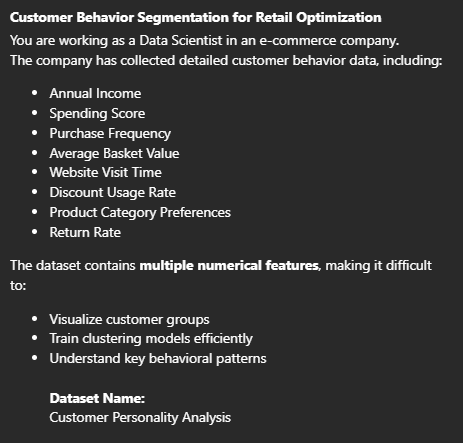
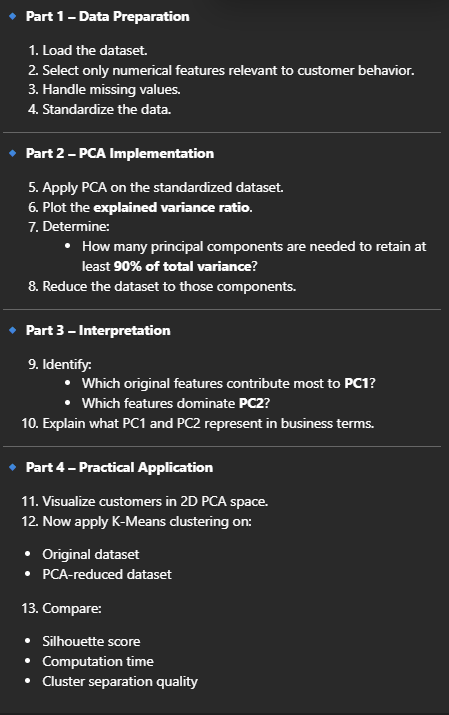

In [14]:
# Q1: Import all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [15]:
# Q1: Mount Google Drive to load dataset

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Load Dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/DataSets/marketing_campaign.csv"
df = pd.read_csv(file_path, delimiter='\t')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [17]:
# Q2: Select only numerical features relevant to customer behavior

num_df = df.select_dtypes(include=['int64', 'float64'])

# Drop ID and constant columns if present
num_df = num_df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], errors='ignore')

num_df.head()


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,0,0,0,0,0,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,0,0,0,0,0,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,0,0,0,0,0,0,0


In [18]:
# Q3: Handle missing values using mean imputation

num_df = num_df.fillna(num_df.mean())

num_df.isnull().sum()


,0
Year_Birth,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0


In [19]:
# Q4: Standardize the data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

scaled_data[:5]


array([[-9.85344730e-01,  2.35326772e-01, -8.25217650e-01,
        -9.29894379e-01,  3.07039263e-01,  9.83781265e-01,
         1.55157698e+00,  1.67970233e+00,  2.46214705e+00,
         1.47650010e+00,  8.43206907e-01,  3.49413941e-01,
         1.40930394e+00,  2.51089024e+00, -5.50784790e-01,
         6.93903739e-01, -2.80140277e-01, -2.83830188e-01,
        -2.80140277e-01, -2.62111217e-01, -1.16510346e-01,
        -9.72816653e-02,  2.38884634e+00],
       [-1.23573295e+00, -2.35826237e-01,  1.03255877e+00,
         9.06934024e-01, -3.83664176e-01, -8.70479481e-01,
        -6.36301155e-01, -7.13225407e-01, -6.50449253e-01,
        -6.31503178e-01, -7.29005787e-01, -1.68236342e-01,
        -1.11040937e+00, -5.68719619e-01, -1.16612540e+00,
        -1.30463472e-01, -2.80140277e-01, -2.83830188e-01,
        -2.80140277e-01, -2.62111217e-01, -1.16510346e-01,
        -9.72816653e-02, -4.18612107e-01],
       [-3.17642799e-01,  7.73633266e-01, -8.25217650e-01,
        -9.29894379e-01, -7.9

In [20]:
# Q5: Apply PCA on standardized dataset

pca = PCA()
pca_data = pca.fit_transform(scaled_data)

pca_data[:5]


array([[ 3.76731882, -0.04879489, -0.32194049,  2.07178013, -0.09894518,
         0.1042325 ,  0.1575031 , -0.52435483,  1.14680981,  0.80227398,
        -2.8883307 , -0.58894339, -0.73784947, -0.33701381,  0.09854311,
         0.09100559,  0.67911048, -1.01765035,  0.79091097,  0.26378494,
        -0.15912545, -0.75666886, -0.15580186],
       [-2.37182503,  0.22521043, -0.19647202, -0.99579648, -1.21098108,
        -0.12690129, -0.15527905, -0.7089876 ,  0.17039793,  0.89768672,
         0.12147379,  0.20216638,  0.33171533,  0.2934842 , -0.29061236,
         0.29529425,  0.07113419, -0.16318215, -0.01379897,  0.22543126,
        -0.18869019, -0.12337704,  0.04020293],
       [ 1.61878321,  0.13227968, -1.05837271, -0.08154747, -0.29073989,
        -0.85251231,  0.47453206,  0.99787728,  0.26409862, -0.79179687,
         0.12268646, -0.35938802, -0.13265244, -0.80410711, -0.65397693,
         0.68096416, -0.78120458,  0.32366805,  0.7002958 , -0.87494879,
        -0.08086528, -0.1176

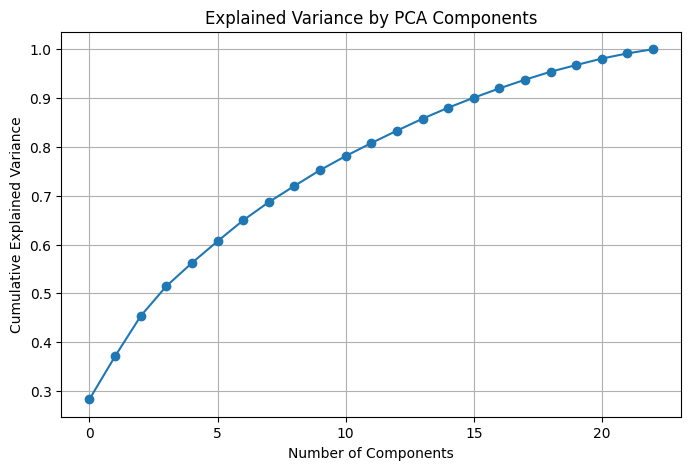

In [21]:
# Q6: Plot explained variance ratio

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid()
plt.show()


In [22]:
# Q7: Determine how many components retain at least 90% variance

cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(cum_var >= 0.90) + 1

print("Components needed for 90% variance:", n_components_90)


Components needed for 90% variance: 16


In [23]:
# Q8: Reduce dataset to required principal components

pca_final = PCA(n_components=n_components_90)
reduced_data = pca_final.fit_transform(scaled_data)

reduced_data[:5]


array([[ 3.76731882, -0.04879489, -0.32194049,  2.07178013, -0.09894518,
         0.1042325 ,  0.1575031 , -0.52435483,  1.14680981,  0.80227398,
        -2.8883307 , -0.58894339, -0.73784947, -0.33701381,  0.09854311,
         0.09100559],
       [-2.37182503,  0.22521043, -0.19647202, -0.99579648, -1.21098108,
        -0.12690129, -0.15527905, -0.7089876 ,  0.17039793,  0.89768672,
         0.12147379,  0.20216638,  0.33171533,  0.2934842 , -0.29061236,
         0.29529425],
       [ 1.61878321,  0.13227968, -1.05837271, -0.08154747, -0.29073989,
        -0.85251231,  0.47453206,  0.99787728,  0.26409862, -0.79179687,
         0.12268646, -0.35938802, -0.13265244, -0.80410711, -0.65397693,
         0.68096416],
       [-2.5099399 , -1.41474068, -0.07027259,  0.26433409,  0.49229387,
        -0.79105627,  0.59463892,  0.30312003, -0.30683861, -0.09437923,
         0.37627744,  0.08648801, -0.06985181, -0.04425675, -0.27602358,
        -0.09346819],
       [-0.45523684, -0.12010261, -0

In [24]:
# Q9: Identify which original features contribute most to PC1 and PC2

loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(pca.components_))],
                        index=num_df.columns)

print("Top contributors to PC1:")
print(loadings['PC1'].abs().sort_values(ascending=False).head())

print("\nTop contributors to PC2:")
print(loadings['PC2'].abs().sort_values(ascending=False).head())


Top contributors to PC1:
NumCatalogPurchases    0.318640
MntMeatProducts        0.312456
MntWines               0.306415
Income                 0.290921
NumStorePurchases      0.282799
Name: PC1, dtype: float64

Top contributors to PC2:
Teenhome             0.540716
NumDealsPurchases    0.457834
NumWebPurchases      0.352284
Year_Birth           0.341901
NumStorePurchases    0.213293
Name: PC2, dtype: float64


In [25]:
# Q10: Explain what PC1 and PC2 represent in business terms

print("PC1 usually represents overall customer spending behavior.")
print("PC2 may represent response to marketing campaigns or purchase frequency differences.")


PC1 usually represents overall customer spending behavior.
PC2 may represent response to marketing campaigns or purchase frequency differences.


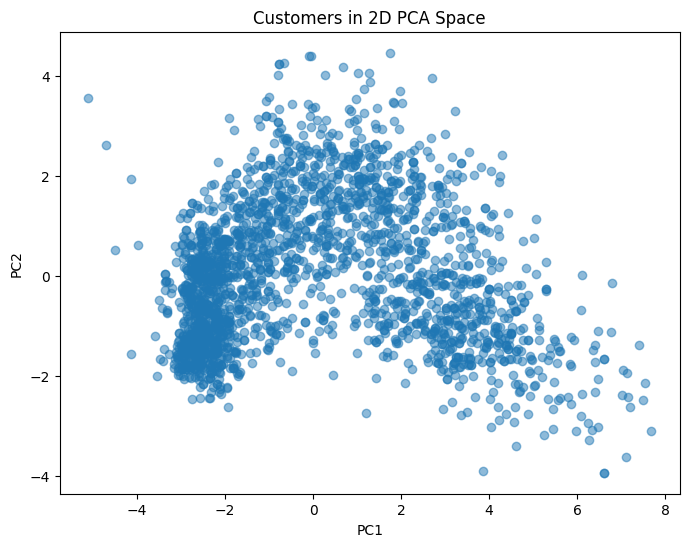

In [26]:
# Q11: Visualize customers in 2D PCA space

pca_2d = PCA(n_components=2)
pca_2d_data = pca_2d.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(pca_2d_data[:,0], pca_2d_data[:,1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customers in 2D PCA Space")
plt.show()


In [27]:
# Q12: Apply KMeans clustering on original dataset

start = time.time()

kmeans_orig = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_orig = kmeans_orig.fit_predict(scaled_data)

time_orig = time.time() - start
sil_orig = silhouette_score(scaled_data, labels_orig)

print("Silhouette Score (Original):", sil_orig)
print("Computation Time (Original):", time_orig)


Silhouette Score (Original): 0.19093113841221354
Computation Time (Original): 0.3111879825592041


In [28]:
# Q12: Apply KMeans clustering on PCA-reduced dataset

start = time.time()

kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(reduced_data)

time_pca = time.time() - start
sil_pca = silhouette_score(reduced_data, labels_pca)

print("Silhouette Score (PCA):", sil_pca)
print("Computation Time (PCA):", time_pca)


Silhouette Score (PCA): 0.21195262989846655
Computation Time (PCA): 0.14488959312438965


In [29]:
# Q13: Compare silhouette score, computation time, and cluster quality

print("----- FINAL COMPARISON -----")
print("Silhouette Score (Original):", sil_orig)
print("Silhouette Score (PCA):", sil_pca)
print("Time Taken (Original):", time_orig)
print("Time Taken (PCA):", time_pca)

if sil_pca > sil_orig:
    print("PCA improved clustering quality.")
else:
    print("Original dataset performed better or similar.")


----- FINAL COMPARISON -----
Silhouette Score (Original): 0.19093113841221354
Silhouette Score (PCA): 0.21195262989846655
Time Taken (Original): 0.3111879825592041
Time Taken (PCA): 0.14488959312438965
PCA improved clustering quality.
